<a href="https://colab.research.google.com/github/Rohan-crypt/DeepLearning/blob/main/DL_Exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 6: Training Deep Networks (Loss, Backpropagation & Optimization)
· Implement and visualize Activation Functions (Sigmoid, ReLU, Tanh, Softmax, etc.) and Loss Functions (MSE, Cross-Entropy).  Generate plots to understand their behavior.
· Implement Backpropagation for training the network.
· Compare Optimizers (SGD, Momentum, Adam) on a small dataset to understand convergence speed and performance.

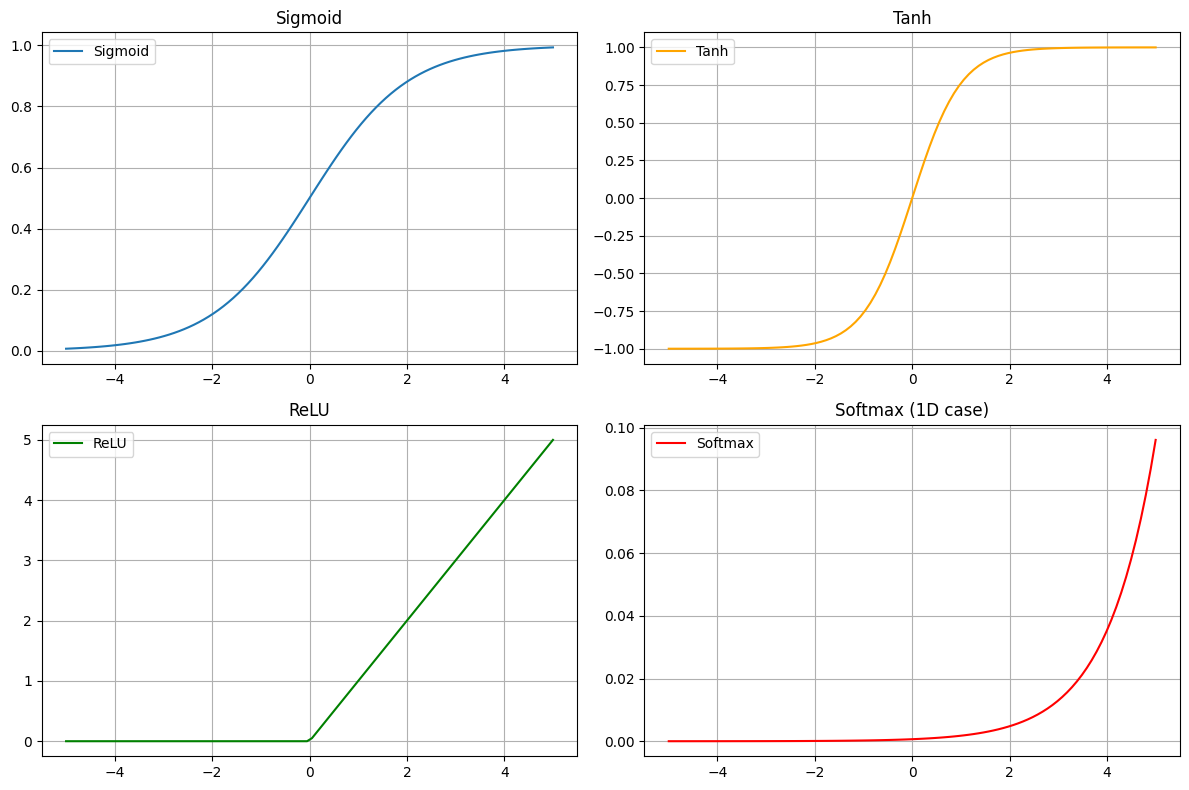

MSE (Good Prediction): 0.024999999999999994
MSE (Bad Prediction): 0.7250000000000001
CrossEntropy (Good): 0.16425203336796243
CrossEntropy (Bad): 1.9560115019640731


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Activation Functions --------
def sigmoid(x): return 1/(1+np.exp(-x))
def tanh(x): return np.tanh(x)
def relu(x): return np.maximum(0,x)
def softmax(x): return np.exp(x)/np.sum(np.exp(x), axis=0)

x = np.linspace(-5, 5, 100)

# Plot activation functions
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.title("Sigmoid"); plt.grid(); plt.legend()

plt.subplot(2,2,2)
plt.plot(x, tanh(x), label="Tanh", color="orange")
plt.title("Tanh"); plt.grid(); plt.legend()

plt.subplot(2,2,3)
plt.plot(x, relu(x), label="ReLU", color="green")
plt.title("ReLU"); plt.grid(); plt.legend()

plt.subplot(2,2,4)
plt.plot(x, softmax(x), label="Softmax", color="red")
plt.title("Softmax (1D case)"); plt.grid(); plt.legend()

plt.tight_layout()
plt.show()

# -------- Loss Functions --------
# MSE
def mse(y_true, y_pred): return np.mean((y_true - y_pred)**2)

# Cross-Entropy (binary)
def cross_entropy(y_true, y_pred):
    eps = 1e-10
    return -np.mean(y_true*np.log(y_pred+eps) + (1-y_true)*np.log(1-y_pred+eps))

y_true = np.array([0,1,1,0])
y_pred_good = np.array([0.1,0.9,0.8,0.2])
y_pred_bad  = np.array([0.9,0.1,0.2,0.8])

print("MSE (Good Prediction):", mse(y_true,y_pred_good))
print("MSE (Bad Prediction):", mse(y_true,y_pred_bad))
print("CrossEntropy (Good):", cross_entropy(y_true,y_pred_good))
print("CrossEntropy (Bad):", cross_entropy(y_true,y_pred_bad))


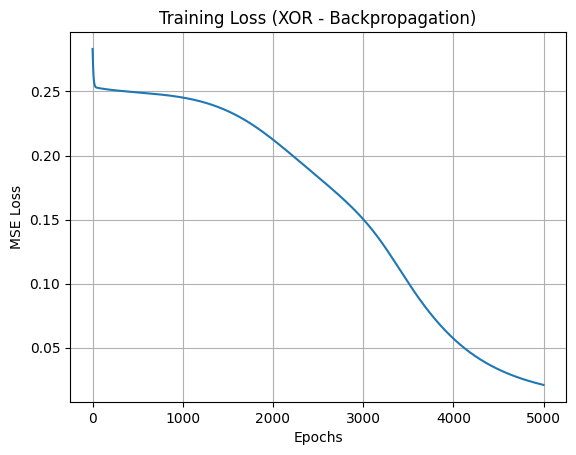

Final Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


In [ ]:
# Simple 2-layer NN for XOR with backpropagation

# Data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

# Activation + derivative
def sigmoid(x): return 1/(1+np.exp(-x))
def sigmoid_derivative(x): return x*(1-x)

# Initialize weights
np.random.seed(42)
W1 = np.random.randn(2,4)  # 2 inputs -> 4 hidden neurons
b1 = np.zeros((1,4))
W2 = np.random.randn(4,1)  # 4 hidden -> 1 output
b2 = np.zeros((1,1))
lr = 0.1

losses = []

# Training
for epoch in range(5000):
    # Forward
    hidden = sigmoid(np.dot(X,W1)+b1)
    output = sigmoid(np.dot(hidden,W2)+b2)

    # Loss (MSE)
    loss = np.mean((Y-output)**2)
    losses.append(loss)

    # Backprop
    d_output = (Y-output) * sigmoid_derivative(output)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden)

    # Update
    W2 += hidden.T.dot(d_output)*lr
    b2 += np.sum(d_output,axis=0,keepdims=True)*lr
    W1 += X.T.dot(d_hidden)*lr
    b1 += np.sum(d_hidden,axis=0,keepdims=True)*lr

# Plot loss curve
plt.plot(losses)
plt.title("Training Loss (XOR - Backpropagation)")
plt.xlabel("Epochs"); plt.ylabel("MSE Loss")
plt.grid(); plt.show()

print("Final Predictions:")
print(output.round())


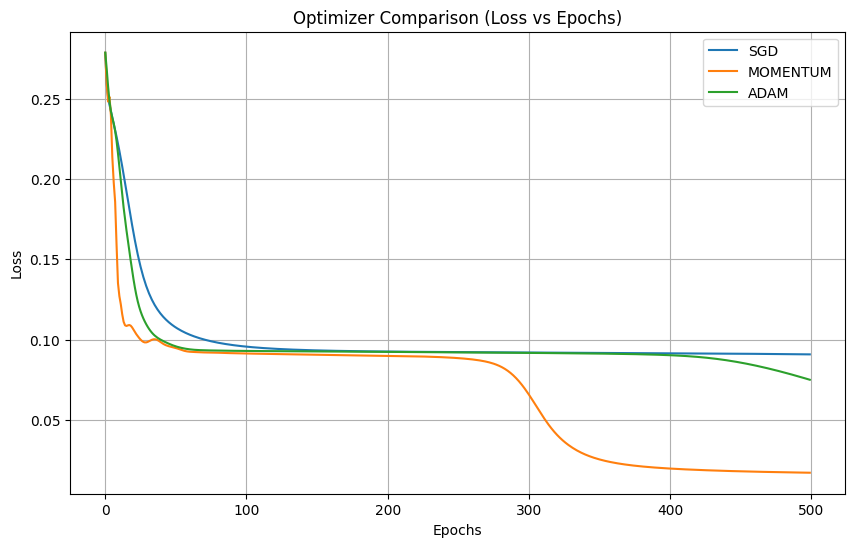

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate dataset
X, Y = make_moons(n_samples=500, noise=0.2, random_state=42)
Y = Y.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Sigmoid + derivative
def sigmoid(x): return 1/(1+np.exp(-x))
def sigmoid_derivative(x): return x*(1-x)

# Training function with optimizer
def train_nn(X, Y, optimizer="sgd", epochs=1000, lr=0.01, beta=0.9):
    np.random.seed(42)
    W1 = np.random.randn(2,4)
    b1 = np.zeros((1,4))
    W2 = np.random.randn(4,1)
    b2 = np.zeros((1,1))

    vW1 = np.zeros_like(W1); vW2 = np.zeros_like(W2)
    vb1 = np.zeros_like(b1); vb2 = np.zeros_like(b2) # Initialize velocity for biases
    mW1 = np.zeros_like(W1); mW2 = np.zeros_like(W2)
    mb1 = np.zeros_like(b1); mb2 = np.zeros_like(b2) # Initialize momentum for biases

    losses = []
    for epoch in range(epochs):
        # Forward
        hidden = sigmoid(np.dot(X,W1)+b1)
        output = sigmoid(np.dot(hidden,W2)+b2)
        loss = np.mean((Y-output)**2)
        losses.append(loss)

        # Backprop
        d_output = (Y-output)*sigmoid_derivative(output)
        d_hidden = d_output.dot(W2.T)*sigmoid_derivative(hidden)

        grad_W2 = hidden.T.dot(d_output)
        grad_b2 = np.sum(d_output,axis=0,keepdims=True)
        grad_W1 = X.T.dot(d_hidden)
        grad_b1 = np.sum(d_hidden,axis=0,keepdims=True)

        # --- Optimizers ---
        if optimizer=="sgd":
            W2 += lr*grad_W2; b2 += lr*grad_b2
            W1 += lr*grad_W1; b1 += lr*grad_b1

        elif optimizer=="momentum":
            vW2 = beta*vW2 + lr*grad_W2
            vW1 = beta*vW1 + lr*grad_W1
            vb2 = beta*vb2 + lr*grad_b2 # Momentum update for b2
            vb1 = beta*vb1 + lr*grad_b1 # Momentum update for b1
            W2 += vW2; b2 += vb2 # Use vb2 to update b2
            W1 += vW1; b1 += vb1 # Use vb1 to update b1

        elif optimizer=="adam":
            # Adam params
            beta1, beta2, eps = 0.9, 0.999, 1e-8

            # Update momentum and velocity for weights
            mW2 = beta1*mW2 + (1-beta1)*grad_W2
            mW1 = beta1*mW1 + (1-beta1)*grad_W1
            vW2 = beta2*vW2 + (1-beta2)*(grad_W2**2)
            vW1 = beta2*vW1 + (1-beta2)*(grad_W1**2)

            # Update momentum and velocity for biases
            mb2 = beta1*mb2 + (1-beta1)*grad_b2
            mb1 = beta1*mb1 + (1-beta1)*grad_b1
            vb2 = beta2*vb2 + (1-beta2)*(grad_b2**2)
            vb1 = beta2*vb1 + (1-beta2)*(grad_b1**2)

            # Apply Adam update for weights and biases
            W2 += lr*mW2/(np.sqrt(vW2)+eps)
            W1 += lr*mW1/(np.sqrt(vW1)+eps)
            b2 += lr*mb2/(np.sqrt(vb2)+eps) # Adam update for b2
            b1 += lr*mb1/(np.sqrt(vb1)+eps) # Adam update for b1


    return losses

# Compare optimizers
optimizers = ["sgd","momentum","adam"]
plt.figure(figsize=(10,6))
for opt in optimizers:
    losses = train_nn(X_train,Y_train,optimizer=opt,epochs=500)
    plt.plot(losses,label=opt.upper())

plt.title("Optimizer Comparison (Loss vs Epochs)")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend(); plt.grid(); plt.show()